Lors de la visite au laboratoire d'une brillante élève de seconde (salut Lena!), nous avons inventé ensemble un jeu: *le jeu de l'urne*. Le principe est simple: il faut deviner la couleur de la balle qu'on tire d'une urne contenant autant de balles rouges que noires - et ceci le plus tôt possible. Plus précisément, les règles sont:

* On a un ensemble de balles, la motié sont rouges, l'autre moitié noires (c'est donc un nombre pair de balles qu'on appelera $N$, disons $N=8$). 
* Elles sont dans une urne opaque et donc on ne peut pas les voir à moins de les tirer une par une (sans remise dans l'urne). On peut tirer autant de balles qu'on veut pour les observer.
* Le but est de deviner la balle qu'on va tirer. Si on gagne (on a bien prédit la couleur), alors on gagne autant de points que le nombre de balles qui étaient dans l'urne au moment de la décision. Sinon on perd autant de points que l'on en aurait gagné! 
* à long terme, la stratégie du jeu est de décider le meilleur moment où on est prêt à deviner la couleur de la balle qu'on va prendre et ainsi de gagner le plus de points possibles.

Nous avons d'abord créé ce jeu grâce au language de programmation [Scratch](//scratch.mit.edu) sur https://scratch.mit.edu/projects/165806365/:

<iframe allowtransparency="true" width="485" height="402" src="//scratch.mit.edu/projects/embed/165806365/?autostart=false" frameborder="0" allowfullscreen></iframe>

Ici, nous allons essayer de l'analyser plus finement.

<!-- TEASER_END -->


Par exemple, je choisis de regarder une balle (rouge), puis un seconde (encore rouge), enfin une troisième (noire) - je décide de parier pour une noire, mais une rouge sort: j'ai perdu $8-3=5$ points. Une autre fois, je tire une balle rouge, une autre balle (cette fois noire): je parie noir et c'est la couleur qui sort: je gagne $8-2=6$ points.

Ce jeu parait simple (je suis curieux de savoir s'il existe, le contraire m'étonnerait) - mais son analyse mathématique implique des combinaisons dont le nombre grandit vite: quelle est la stratégie optimale? C'est ce que nous essaierons de faire ici.

***Note:*** ce jeu pourrait paraitre anodin, mais il est révélateur de notre capacité à prendre des décisions par rapport à ce que l'on sait et ce qui pourrait arriver: c'est la base de la *théorie de la décision*. Cette théorie est notamment essentielle pour comprendre le fonctionnement normal (ou pathologique comme pour la schizophrénie) et de mieux le comprendre (ou le diagnostiquer).


Cette page est un "notebook", c'est-à-dire une page qui combine des commentaires avec des "cellules" contenant du code informatique qui permet de manipuler et représenter explicitement ou visuellement des informations. On peut donc le télécharger et expérimenter ces étapes une par une par soi-même.

## quelque bases de programmation

Nous allons ici utiliser un langage de programmation  pour communiquer avec l'ordinateur et lui faire effectuer des séquences de calcul. Pour sa simplicité et son ouverture, nous allons utiliser le langage Python. Ensuite, nos allons aborder qulques notions de statistiques utiles pour ce jeu. Si vous pensez posséder ces bases, vous pouvez directement passer à la [suite](#application-au-jeu-de-l'urne:-méthode-des-tests). Programmer en python, c'est auusi simple que de parler en anglais, en voici quelques exemples:

In [1]:
print('Bonjour Lena')

Bonjour Lena


Des opérations mathémtiques de base :

In [2]:
2 * 5

10

In [3]:
 3 / 4 

0.75

``a**b`` désigne  "a puissance b"

In [4]:
2**0 + 2**1 +  4**1.5

11.0

créons une liste d'objets en les énumérant entre les symboles ``[`` et ``]``:

In [5]:
une_liste = [ 1, 4, 5 ]

In [6]:
print(une_liste)

[1, 4, 5]


On peut facilement la manipuler en ajoutant un élément:

In [7]:
une_liste.append(6)

In [8]:
print(une_liste)

[1, 4, 5, 6]


on peut donc aussi faire une liste pour notre jeu:

In [9]:
une_liste_B = []

In [10]:
une_liste_B.append(0)

In [11]:
une_liste_B.append(1)

In [12]:
une_liste_B.append(0)

In [13]:
une_liste_B.append(0)

In [14]:
une_liste_B

[0, 1, 0, 0]

ou de façon plus explicite (pour changer, au lieu de parler de balles rouges ou noires, on va ici parler de ballons de foot``='⚽️'`` ou de basket ``='🏀'``):

In [15]:
N_ballons  = 8

une_liste_C = []
for j in range(N_ballons//2):
    une_liste_C.append('🏀')
for j in range(N_ballons//2):
    une_liste_C.append('⚽️')
print(une_liste_C)

['🏀', '🏀', '🏀', '🏀', '⚽️', '⚽️', '⚽️', '⚽️']


il y a encore plein d'autres façons d'utiliser des listes:

In [16]:
liste_de_listes = [une_liste, une_liste_B, une_liste_C ]
print(liste_de_listes)

[[1, 4, 5, 6], [0, 1, 0, 0], ['🏀', '🏀', '🏀', '🏀', '⚽️', '⚽️', '⚽️', '⚽️']]


À noter, un autre objet très utile en programmation est un dictionaire:

In [17]:
dico_français_anglais = dict(watch='montre', name='name', age='age')

In [18]:
name = 'watch'
print('La traduction du mot anglais "', name, 
      '" en français est "', dico_français_anglais[name],'".')

La traduction du mot anglais " watch " en français est " montre ".


## quelque bases de statistiques et de probabilités

Pour analyser notre jeu, nous allons avoir besoin de quelques outils mathématiques - si vous pensez posséder ces bases, vous pouvez directement passer à la [suite](#application-au-jeu-de-l'urne:-méthode-des-tests). Une fonction importante pour analyser notre jeu est d'utiliser des générateurs de nombres aléatoires (dans la librairie ``numpy.random``).

In [19]:
import numpy as np
np.set_printoptions(precision=6, suppress=True)

et de fonctions de visualisation pour afficher par exemple des histogrammes avec ``plt.hist``. 

In [20]:
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

on définit la taille des figures selon le nombre d'or:

In [21]:
phi = (np.sqrt(5)+1)/2
fig_width = 10 # en pouces
figsize = (fig_width, fig_width/phi)

In [22]:
print('2 π =', 2 * np.pi)

2 π = 6.283185307179586


Explorons direct l'histogramme de $1000000$ tirages d'une variable aléatoire uniforme entre $0$ et $5$:

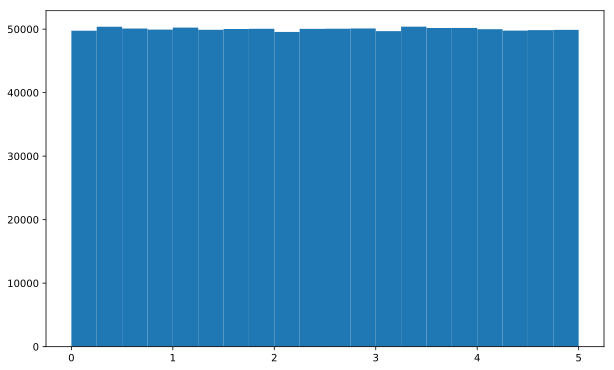

In [23]:
fig, ax = plt.subplots(figsize=figsize)
ax.hist(5 * np.random.rand(1000000), bins=20);

La même chose avec une variable aléatoire en cloche qui représente bien des statistiques de population:

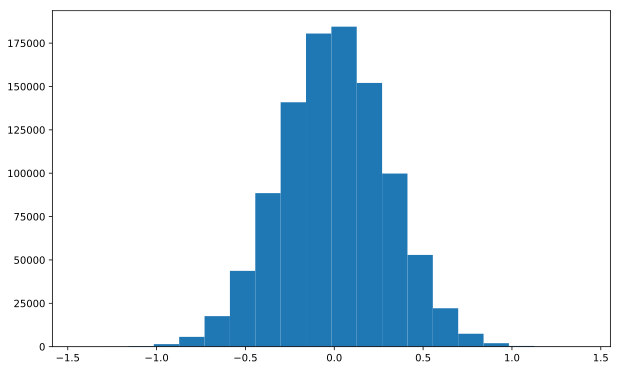

In [24]:
fig, ax = plt.subplots(figsize=figsize)
ax.hist(.3 * np.random.randn(1000000), bins=20);

En particulier, si on prend un nombre aléatoire entre 0 et 1:

In [25]:
np.random.rand()

0.5099806399762091

il est facile de le transformer en une valeur binaire aléatoire (soit vraie ou fausse, soit ``True`` ou ``False``):

In [26]:
np.random.rand() > .5

True

D'où le tirage d'une variable aléatoire binaire:

(array([ 55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

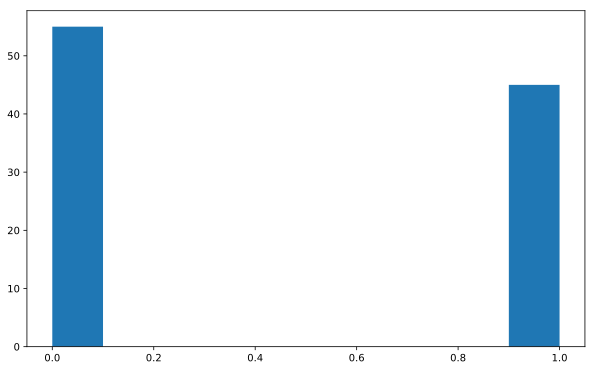

In [27]:
fig, ax = plt.subplots(figsize=figsize)
resultats = np.random.rand(100) > .5
ax.hist(resultats)

Si on la considère comme une séquence de tirages d'un dé non pipé, on peut la transformer un un gain poistif ($+1$) ou négatif ($-1$):

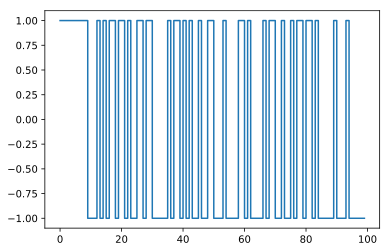

In [28]:
plt.step(np.arange(100), 2*resultats-1);

Un intéret pour notre jeu est de considérer le gain accumulé pour des paris, et on "plotte" ici le gain accumulé sur $20$ différentes parties en fonction du temps ($100$ cycles):

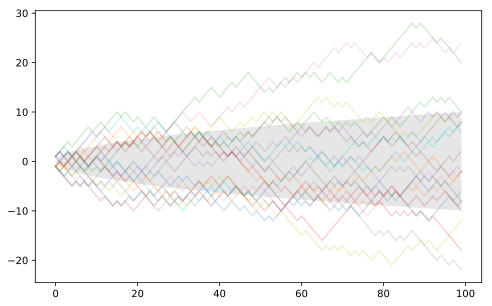

In [29]:
resultats = np.random.rand(100, 20) > .5
gains = 2*resultats-1
gains_cumulés = np.cumsum(gains, axis=0)
fig, ax = plt.subplots(figsize=(8, 5))
t = np.arange(100)
std = np.sqrt(t) * gains.std()
ax.fill_between(t, std, -std, color='k', edgecolor='none', lw=0, alpha=0.1);
ax.plot(gains_cumulés, alpha=0.2);


Ces courbes sont importantes: elles montrent que lors d'un jeu non biaisé, les courbes de gain ont en moyenne un gain nul. On montre que leur variance (c'est à dire le carré de la déviation à cette moyenne nulle) augmente proportionnellement et linéairement avec le temps. On donne à ce mouvement le mouvement de mouvement brownien ou de "marche de l'alcoolique" à cause de la forme aléatoire des changements de direction...

## application au jeu de l'urne: méthode des tests

Une première stratégie pour étudier notre jeu est d'essayer de dénombrer tous les jeux possibles. Dans notre cas particulier, ils consistent en toutes les combinaisons de l'ordre d'occurence des couleurs. Si on les numérote de $0$ à $7$, les occurences de la couleur rouge peuvent par exemple être $[0, 5, 6, 7]$, $[2, 3, 5, 7]$ ou encore $[0, 1, 2, 4]$. Le nombre de façon de tirer $k=4$ nombres parmi $n=8$ est noté $C_n^k$ ou aussi $(^k_n)$ et vaut $\frac{n!}{k! (n-k)!}$ où $n$ est le nombre total de balles et $k$ le nombre de balles rouges et $m!= 1 \times 2 \times \ldots  \times m$ est la factorielle de $m$. On va donc pouvoir utiliser la fonction ``combinations`` de la librairie ``itertools`` (cf https://docs.python.org/3/library/itertools.html#itertools.combinations ) pour former tous ces jeux.

In [30]:
def factorial(n): return np.prod(np.arange(n)+1)

from itertools import combinations
N_ballons = 8
N_basket = N_ballons//2
indices = list(combinations(range(N_ballons), N_basket))
print ('Il y a', len(indices), 'combinaisons. (On avait prédit', 
       int(factorial(N_ballons)/factorial(N_basket)/factorial(N_ballons-N_basket)), ' 😎). ')
for index in indices:
    test = np.zeros(N_ballons, dtype=np.int)
    test[list(index)] = 1
    print('index = ', index, ' - test = ', test)

Il y a 70 combinaisons. (On avait prédit 70  😎). 
index =  (0, 1, 2, 3)  - test =  [1 1 1 1 0 0 0 0]
index =  (0, 1, 2, 4)  - test =  [1 1 1 0 1 0 0 0]
index =  (0, 1, 2, 5)  - test =  [1 1 1 0 0 1 0 0]
index =  (0, 1, 2, 6)  - test =  [1 1 1 0 0 0 1 0]
index =  (0, 1, 2, 7)  - test =  [1 1 1 0 0 0 0 1]
index =  (0, 1, 3, 4)  - test =  [1 1 0 1 1 0 0 0]
index =  (0, 1, 3, 5)  - test =  [1 1 0 1 0 1 0 0]
index =  (0, 1, 3, 6)  - test =  [1 1 0 1 0 0 1 0]
index =  (0, 1, 3, 7)  - test =  [1 1 0 1 0 0 0 1]
index =  (0, 1, 4, 5)  - test =  [1 1 0 0 1 1 0 0]
index =  (0, 1, 4, 6)  - test =  [1 1 0 0 1 0 1 0]
index =  (0, 1, 4, 7)  - test =  [1 1 0 0 1 0 0 1]
index =  (0, 1, 5, 6)  - test =  [1 1 0 0 0 1 1 0]
index =  (0, 1, 5, 7)  - test =  [1 1 0 0 0 1 0 1]
index =  (0, 1, 6, 7)  - test =  [1 1 0 0 0 0 1 1]
index =  (0, 2, 3, 4)  - test =  [1 0 1 1 1 0 0 0]
index =  (0, 2, 3, 5)  - test =  [1 0 1 1 0 1 0 0]
index =  (0, 2, 3, 6)  - test =  [1 0 1 1 0 0 1 0]
index =  (0, 2, 3, 7)  - test = 

Alternativement, nous utiliserons aussi une autre stratégie plus simple de prime abord car elle correspond à la réalité du déroulement d'un jeu réel: réalisons plein de tirages au hasard (c'est la méthode dite de Monte Carlo). d'abord pour un "test":

In [31]:
def generate_test(N_ballons, N_test=1):
    assert (N_ballons/2 == N_ballons//2) # on vérifie que c'est pair
    tests = np.zeros((N_test, N_ballons), dtype=np.int)
    N_basket = N_ballons//2 # on a moitié de ballons de basket
    tests[:, N_basket:] = 1.
    for i_test in range(N_test):
        tests[i_test, :] = np.random.permutation(tests[i_test, :])
    return tests

test = generate_test(N_ballons)            
print(test)

[[0 1 0 0 0 1 1 1]]


on peut noter l'utilisation de la fonction ``np.random.permutation`` qui permet de ranger de façon aléatoire une liste (ici les $1$ dénotent arbitrairement des ballons de basket 🏀). 

Cette fonction permet de générer un grand nombre de tirages:

In [32]:
N_test = 1000
tests = generate_test(N_ballons, N_test)

test = tests[N_test//13, :]
print(test)

[1 1 0 0 1 1 0 0]


On vérifie alors que le nombre moyen de ballons de baskets est bien $N/2$, et ceci exactement:

In [33]:
print('le nombre de valeurs True = ', np.mean(tests.sum(axis=1)), ' +/- ', np.std(tests.sum(axis=1)))

le nombre de valeurs True =  4.0  +/-  0.0


Créons donc une fonction qui puisse faire ces deux types de tests:

In [34]:
N_ballons = 8
N_basket = N_ballons//2 # on a moitié de ballons de basket
N_test = None
def generate_test(N_ballons=N_ballons, N_basket=N_basket, N_test=N_test, verbose=False):
    if N_test is None:
        indices = list(combinations(range(N_ballons), N_basket))
        tests = np.zeros((len(indices), N_ballons), dtype=np.int)
        for i_test in range(len(indices)):
            tests[i_test, list(indices[i_test])] = 1
            if verbose : print('index = ', indices[i_test], ' - test = ', tests[i_test, :])
    else:
        tests = np.zeros((N_test, N_ballons), dtype=np.int)
        tests[:, :N_basket] = 1
        for i_test in range(N_test):
            tests[i_test, :] = np.random.permutation(tests[i_test, :])
    return tests
tests = generate_test(N_ballons=N_ballons, N_basket=N_basket, N_test=N_test, verbose=True)

index =  (0, 1, 2, 3)  - test =  [1 1 1 1 0 0 0 0]
index =  (0, 1, 2, 4)  - test =  [1 1 1 0 1 0 0 0]
index =  (0, 1, 2, 5)  - test =  [1 1 1 0 0 1 0 0]
index =  (0, 1, 2, 6)  - test =  [1 1 1 0 0 0 1 0]
index =  (0, 1, 2, 7)  - test =  [1 1 1 0 0 0 0 1]
index =  (0, 1, 3, 4)  - test =  [1 1 0 1 1 0 0 0]
index =  (0, 1, 3, 5)  - test =  [1 1 0 1 0 1 0 0]
index =  (0, 1, 3, 6)  - test =  [1 1 0 1 0 0 1 0]
index =  (0, 1, 3, 7)  - test =  [1 1 0 1 0 0 0 1]
index =  (0, 1, 4, 5)  - test =  [1 1 0 0 1 1 0 0]
index =  (0, 1, 4, 6)  - test =  [1 1 0 0 1 0 1 0]
index =  (0, 1, 4, 7)  - test =  [1 1 0 0 1 0 0 1]
index =  (0, 1, 5, 6)  - test =  [1 1 0 0 0 1 1 0]
index =  (0, 1, 5, 7)  - test =  [1 1 0 0 0 1 0 1]
index =  (0, 1, 6, 7)  - test =  [1 1 0 0 0 0 1 1]
index =  (0, 2, 3, 4)  - test =  [1 0 1 1 1 0 0 0]
index =  (0, 2, 3, 5)  - test =  [1 0 1 1 0 1 0 0]
index =  (0, 2, 3, 6)  - test =  [1 0 1 1 0 0 1 0]
index =  (0, 2, 3, 7)  - test =  [1 0 1 1 0 0 0 1]
index =  (0, 2, 4, 5)  - test =

### une première stratégie: choix a priori d'un nombre fixe

Adoptons tout d'abord la stratégie d'un agent qui de façon tétue se dirait qu'il allait regarder un nombre fixe de ballons (par exemple 2) puis se décider pour la solution la plus probable:

In [35]:
N_ballons_vus = 3
information = test[:N_ballons_vus]
information

array([1, 1, 0])

In [36]:
N_ballons_restant = N_ballons - N_ballons_vus
print ('on a vu ', N_ballons_vus, ' ballon(s), il en reste',  N_ballons_restant, " dans l'urne")

on a vu  3  ballon(s), il en reste 5  dans l'urne


In [37]:
N_ballons_restant = N_ballons - N_ballons_vus
print ('on en a vu ', sum(information), ' de basket (=True=Droite) donc il reste',  
       N_ballons//2 - sum(information), " ballons de basket  dans l'urne")

on en a vu  2  de basket (=True=Droite) donc il reste 2  ballons de basket  dans l'urne


In [38]:
proba_True_restant = (N_ballons/2 - sum(information)) / N_ballons_restant 
print ('la probabilité de tirer un de basket est ', proba_True_restant*100, '%, ', 
       'contre ', (1-proba_True_restant)*100, "% pour l'autre choix ")

la probabilité de tirer un de basket est  40.0 %,  contre  60.0 % pour l'autre choix 


On prend logiquement la décision de prendre le choix le plus probable, le cas symétrique étant résolu en prenant une décision au hasard:

In [39]:
if proba_True_restant==.5:
    choix = proba_True_restant > np.random.rand()
else:
    choix = proba_True_restant > .5 
print(choix)

False


et on peut prévoir notre gain

In [40]:
gain_esperé = N_ballons_restant # c'est-à-dire N_ballons - N_ballons_restant - 1
print(gain_esperé)

5


et maintenant vérifier si ce choix était le bon 

In [41]:
réussite = (test[N_ballons_vus] == choix)
réussite, réussite*2 - 1

(True, 1)

In [42]:
gain = gain_esperé * (réussite*2 - 1)
#gain = gain_esperé * réussite 
gain

5

à noter, on peut aussi représenter une information vide avec une liste vide:

In [43]:
test[:0]

array([], dtype=int64)

Maintenant que nous avons suivi notre stratégie pour un ballon et sur un test, généralisons le à plusieurs tests:
regardons d'abord un seul ballon:

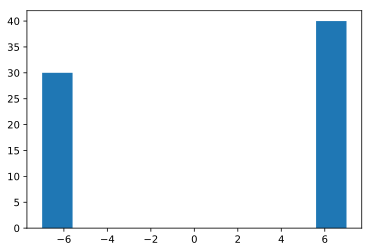

In [44]:
N_test = None
tests = generate_test(N_ballons=N_ballons, N_basket=N_basket, N_test=N_test)
gains = np.zeros(len(tests))
N_ballons_vus = 1
for i_test in range(len(tests)):
    information = tests[i_test, :(N_ballons_vus)]
    N_ballons_restant = N_ballons - N_ballons_vus
    proba_True_restant = (N_ballons//2 - np.sum(information)) / N_ballons_restant 
    if proba_True_restant==.5:
        choix = np.random.rand() > .5
    else:
        choix = proba_True_restant > .5
    réussite = (tests[i_test, N_ballons_vus] == choix)
    gain_esperé = N_ballons_restant
    gains[i_test] = gain_esperé * (réussite*2 - 1)

plt.hist(gains);

et maintenant sur tous les tests:

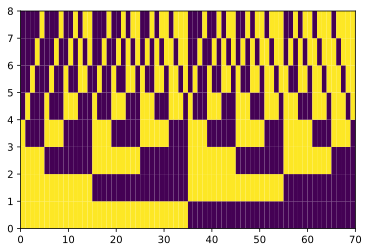

In [45]:
ax = plt.pcolormesh(tests.T);

In [46]:
tests_0 = tests[:, 0]
tests_1 = tests[:, 1]
#print (tests[:, 1:].sum(axis=1), tests[:, 1:].sum(axis=1).std())
print (1. - np.sum(tests_0 == tests_1)/ len(tests_1))

0.571428571429


en résumé, on peut calculer le gain moyen sur un certain nombre de tests :

In [47]:
def agent_tetu(tests, N_ballons_vus, penalité=1, aléatoire=False):
    gains = np.zeros(len(tests))
    for i_test in range(N_test):
        information = tests[i_test, :(N_ballons_vus)]
        N_ballons_restant = N_ballons - N_ballons_vus
        proba_True_restant = (N_ballons//2 - sum(information)) / N_ballons_restant 
        if aléatoire:
            choix = proba_True_restant > np.random.rand()
        else:
            if proba_True_restant==.5:
                choix = np.random.rand() > .5
            else:
                choix = proba_True_restant > .5
        réussite = (tests[i_test, N_ballons_vus] == choix)
        gain_esperé = N_ballons_restant - 1
        gains[i_test] = gain_esperé * (réussite*(1+penalité) - penalité)
    
    return gains

N_test = 1024
tests = generate_test(N_ballons=N_ballons, N_basket=N_basket, N_test=N_test)
gains = agent_tetu(tests, N_ballons_vus=1, aléatoire=False)
print ('gain = ', gains.mean(), '+/-', gains.std())

gain =  0.84375 +/- 5.94037759217


Stratégie aléatoire?  True
Moyenne des gains avec 0 ballons vus = 0.1176  +/-  6.99901209029
Moyenne des gains avec 1 ballons vus = 0.114  +/-  5.99891690224
Moyenne des gains avec 2 ballons vus = 0.24  +/-  4.99423667841
Moyenne des gains avec 3 ballons vus = 0.396  +/-  3.98034973338
Moyenne des gains avec 4 ballons vus = 0.4278  +/-  2.96934119966
Moyenne des gains avec 5 ballons vus = 0.46  +/-  1.94638125762
Moyenne des gains avec 6 ballons vus = 0.419  +/-  0.907986233376
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0
Stratégie aléatoire?  False
Moyenne des gains avec 0 ballons vus = -0.0952  +/-  6.99935261006
Moyenne des gains avec 1 ballons vus = 0.8808  +/-  5.93499716596
Moyenne des gains avec 2 ballons vus = 0.748  +/-  4.9437330025
Moyenne des gains avec 3 ballons vus = 1.0432  +/-  3.86157141071
Moyenne des gains avec 4 ballons vus = 0.7224  +/-  2.91172427266
Moyenne des gains avec 5 ballons vus = 0.8576  +/-  1.80679889307
Moyenne des gains avec 6 ballons vus = 0.

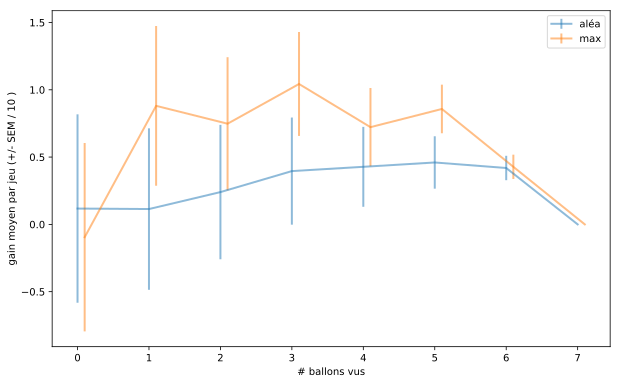

In [48]:
N_test = 10000
fig, ax = plt.subplots(figsize=figsize)
for aléatoire, label in zip([True, False], ['aléa', 'max']):
    print('Stratégie aléatoire? ', aléatoire)
    gains = np.zeros((N_ballons, N_test))

    tests = generate_test(N_ballons=N_ballons, N_basket=N_basket, N_test=N_test)
    for N_ballons_vus in range(N_ballons):
        gains[N_ballons_vus, :] = agent_tetu(tests, N_ballons_vus, aléatoire=aléatoire)
        print('Moyenne des gains avec', N_ballons_vus, 'ballons vus =', np.mean(gains[N_ballons_vus, :]) , ' +/- ', np.std(gains[N_ballons_vus, :]) )

    ax.errorbar(np.arange(N_ballons)-.1*(aléatoire*1-1), y=np.mean(gains, axis=(1)), yerr=np.std(gains, axis=(1))/10, label=label, alpha=.5, lw=2)
    
ax.set_xlabel(' # ballons vus ')
ax.set_ylabel(' gain moyen par jeu (+/- SEM / 10 ) ')
ax.legend();

La stratégie optimale est de choisir la gain a priori maximal.

Première conclusion: le gain évolue en fonction du nombre de ballons vus.

* Les gains sont *en moyenne* toujours positifs, on s'oriente vers un enrichissement infini...
* la variabilité de gain pour chaque jeu individuel est toujours grand et de l'ordre du nombre de points en jeu: on est proche d'un pari de type pile ou face,
* Le comportement d'un agent aléatoire est toujours significativement inférieur,
* La stratégie optimale pour cet agent est de choisir quand on a vu $3$ ballons. On note une oscillation pour des nombres de ballons vus pairs qui est dû au fait que nous ayons deux catégories.


Maintenant on peut imaginer, de régler le paramètre de pénalité pour optimiser le compromis entre précision et gain.

In [49]:
penalités = np.linspace(.5, 1.5, 9)
penalités

array([ 0.5  ,  0.625,  0.75 ,  0.875,  1.   ,  1.125,  1.25 ,  1.375,  1.5  ])

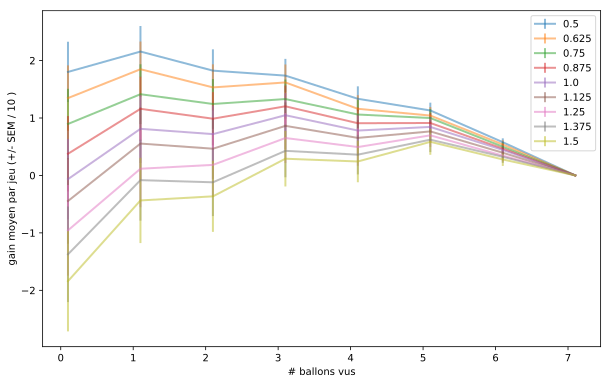

In [50]:
N_test = 10000
fig, ax = plt.subplots(figsize=figsize)
for penalité in penalités:
    gains = np.zeros((N_ballons, N_test))

    tests = generate_test(N_ballons=N_ballons, N_basket=N_basket, N_test=N_test)
    for N_ballons_vus in range(N_ballons):
        gains[N_ballons_vus, :] = agent_tetu(tests, N_ballons_vus, penalité=penalité)

    ax.errorbar(np.arange(N_ballons)-.1*(aléatoire*1-1), y=np.mean(gains, axis=(1)), yerr=np.std(gains, axis=(1))/10, label=str(penalité), alpha=.5, lw=2)
    
ax.set_xlabel(' # ballons vus ')
ax.set_ylabel(' gain moyen par jeu (+/- SEM / 10 ) ')
ax.legend();    


on voit qu'en fonction de la pénalité on peut "encourager" un tel agent tétu à prendre des décisions plus hâtives ou tardives. On restera pour l'instant au cas équilibré avec une pénalité nulle. Clairement, pour un tel agent, la stratégie optimale est de ragarder $3$ ballons puis de se décider. 

Note: on remarque que le gain si on a tout observé est bien nul (l'information est totale mais la récompense est nulle):

In [51]:
print ('gains ', gains[-1, :])

gains  [ 0.  0.  0. ...,  0.  0.  0.]


In [52]:
N_ballons_vus = 7
print('Moyenne des gains avec', N_ballons_vus, 'ballons vus =', np.mean(gains[N_ballons_vus, :]) , ' +/- ', np.std(gains[N_ballons_vus, :]) )

Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0


Pour résumer, nous pouvons "encapsuler" toute la programmation liée à cet agent dans un objet:

Moyenne des gains avec 0 ballons vus = -0.095703125  +/-  6.99934574884
Moyenne des gains avec 1 ballons vus = 0.7939453125  +/-  5.94723892582
Moyenne des gains avec 2 ballons vus = 0.751953125  +/-  4.94313326725
Moyenne des gains avec 3 ballons vus = 0.990234375  +/-  3.87549169559
Moyenne des gains avec 4 ballons vus = 0.77197265625  +/-  2.89897537382
Moyenne des gains avec 5 ballons vus = 0.8984375  +/-  1.78684360216
Moyenne des gains avec 6 ballons vus = 0.423828125  +/-  0.90574263478
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0


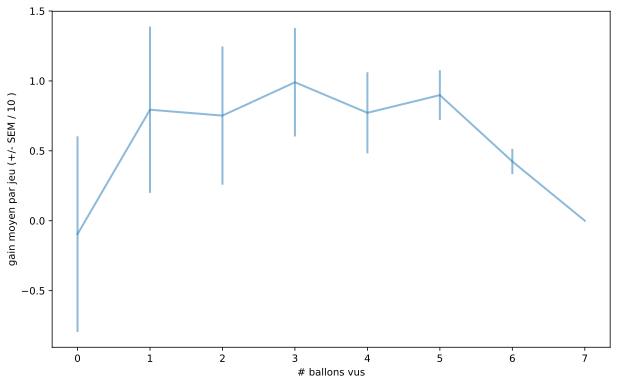

In [53]:
class AgentTétu:

    def __init__(self, N_test=2**12, N_ballons=8, verbose=True):
        self.N_test = N_test
        self.N_ballons = N_ballons
        self.N_basket = N_ballons//2
        self.verbose = verbose

    def generate_test(self):
        return generate_test(N_ballons=self.N_ballons, N_basket=self.N_basket, N_test=self.N_test)

    def agent_tetu(self, tests, N_ballons_vus):
        gains = np.zeros(len(tests))
        for i_test in range(len(tests)):
            information = tests[i_test, :(N_ballons_vus)]
            N_ballons_restant = self.N_ballons - N_ballons_vus
            proba_True_restant = (self.N_ballons//2 - sum(information)) / N_ballons_restant 
            if proba_True_restant==.5:
                if self.N_test is None:
                    gains[i_test] = 0.
                else:
                    choix = np.random.rand() > .5
                    réussite = (tests[i_test, N_ballons_vus] == choix)
                    gain_esperé = N_ballons_restant - 1
                    gains[i_test] = gain_esperé * (réussite*2 - 1)
            else:
                choix = proba_True_restant > .5
                réussite = (tests[i_test, N_ballons_vus] == choix)
                gain_esperé = N_ballons_restant - 1
                gains[i_test] = gain_esperé * (réussite*2 - 1)

        return gains

    def test(self):
        tests = self.generate_test()
        
        gains = np.zeros((self.N_ballons, len(tests)))
        for N_ballons_vus in range(self.N_ballons):
            gains[N_ballons_vus, :] = self.agent_tetu(tests, N_ballons_vus)
            if self.verbose: print('Moyenne des gains avec', N_ballons_vus, 'ballons vus =', np.mean(gains[N_ballons_vus, :]) , 
                  ' +/- ', np.std(gains[N_ballons_vus, :]) )
        return gains

    def plot(self):
        gains = self.test()
        fig, ax = plt.subplots(figsize=figsize)
        ax.errorbar(np.arange(self.N_ballons), y=np.mean(gains, axis=(1)), yerr=np.std(gains, axis=(1))/10, alpha=.5, lw=2)

        ax.set_xlabel(' # ballons vus ')
        ax.set_ylabel(' gain moyen par jeu (+/- SEM / 10 ) ')
        return fig, ax
    
agent = AgentTétu()
agent.plot();

Cet objet nous permet de vérifier que ce comportement ne dépend pas significativement du nombre de test (s'il est significativement plus grand que $70$):

Moyenne des gains avec 0 ballons vus = -0.2734375  +/-  6.994657385
Moyenne des gains avec 1 ballons vus = 1.0078125  +/-  5.91475392259
Moyenne des gains avec 2 ballons vus = 0.498046875  +/-  4.97513309473
Moyenne des gains avec 3 ballons vus = 0.84375  +/-  3.90999820173
Moyenne des gains avec 4 ballons vus = 0.884765625  +/-  2.86656410862
Moyenne des gains avec 5 ballons vus = 0.79296875  +/-  1.83608293972
Moyenne des gains avec 6 ballons vus = 0.4453125  +/-  0.895375215953
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0
367 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


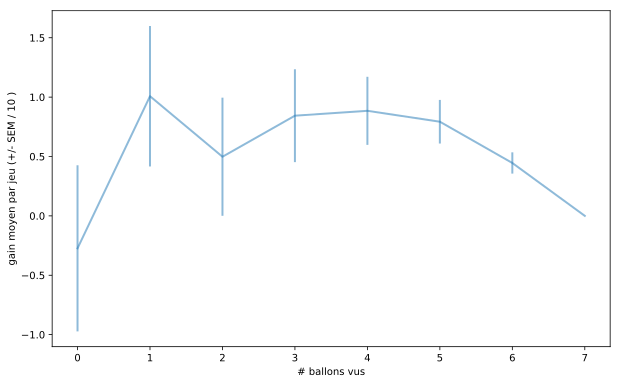

In [54]:
%%timeit -n1 -r1
agent = AgentTétu(N_test=2**10)
agent.plot();

Moyenne des gains avec 0 ballons vus = -0.035888671875  +/-  6.99990799963
Moyenne des gains avec 1 ballons vus = 0.8173828125  +/-  5.94406303279
Moyenne des gains avec 2 ballons vus = 0.655517578125  +/-  4.95684342145
Moyenne des gains avec 3 ballons vus = 1.0703125  +/-  3.85414467195
Moyenne des gains avec 4 ballons vus = 0.77197265625  +/-  2.89897537382
Moyenne des gains avec 5 ballons vus = 0.84228515625  +/-  1.81398889621
Moyenne des gains avec 6 ballons vus = 0.434326171875  +/-  0.90075566966
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0
2.29 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


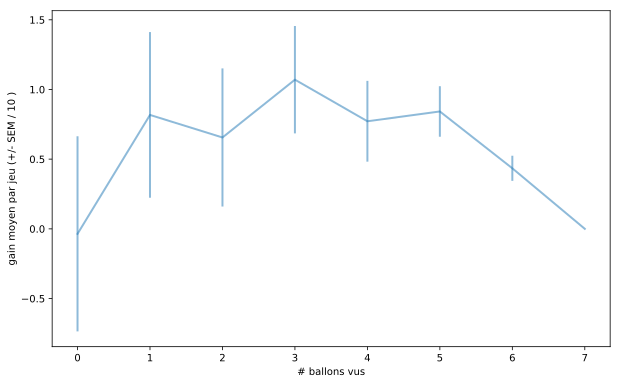

In [55]:
%%timeit -n1 -r1
agent = AgentTétu(N_test=2**13)
agent.plot();

Le résultat exact est donné en calculant sur l'ensemble des combinaisons:

Moyenne des gains avec 0 ballons vus = 0.0  +/-  0.0
Moyenne des gains avec 1 ballons vus = 0.857142857143  +/-  5.93845991166
Moyenne des gains avec 2 ballons vus = 0.714285714286  +/-  3.194382825
Moyenne des gains avec 3 ballons vus = 1.02857142857  +/-  3.86549360578
Moyenne des gains avec 4 ballons vus = 0.771428571429  +/-  1.9432772655
Moyenne des gains avec 5 ballons vus = 0.857142857143  +/-  1.80701580581
Moyenne des gains avec 6 ballons vus = 0.428571428571  +/-  0.494871659305
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0
132 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


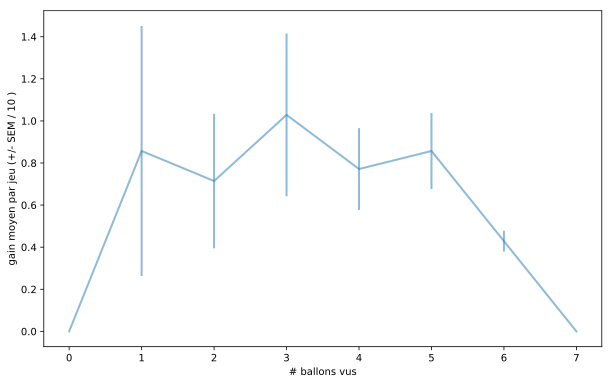

In [56]:
%%timeit -n1 -r1
agent = AgentTétu(N_test=None)
agent.plot();

On observe que la stratégie "Monte Carlo" donne des résultats similaires mais est plus longue à simuler. On pourra choisir notre stratégie computationnelle en fonction de notre budget en resources (ordinateurs, CPU, ...).

On observe aussi que le comportement du jeu est similaire avec plus ou moins de ballons:

Moyenne des gains avec 0 ballons vus = 0.0  +/-  0.0
Moyenne des gains avec 1 ballons vus = 0.933333333333  +/-  13.968854244
Moyenne des gains avec 2 ballons vus = 0.866666666667  +/-  8.83830049023
Moyenne des gains avec 3 ballons vus = 1.29230769231  +/-  11.930211265
Moyenne des gains avec 4 ballons vus = 1.18461538462  +/-  8.2142321289
Moyenne des gains avec 5 ballons vus = 1.46853146853  +/-  9.89158305459
Moyenne des gains avec 6 ballons vus = 1.32167832168  +/-  6.89440981475
Moyenne des gains avec 7 ballons vus = 1.52292152292  +/-  7.85370677037
Moyenne des gains avec 8 ballons vus = 1.33255633256  +/-  5.34495135289
Moyenne des gains avec 9 ballons vus = 1.46853146853  +/-  5.8175093748
Moyenne des gains avec 10 ballons vus = 1.22377622378  +/-  3.70299364892
Moyenne des gains avec 11 ballons vus = 1.29230769231  +/-  3.78549083058
Moyenne des gains avec 12 ballons vus = 0.969230769231  +/-  2.04540182826
Moyenne des gains avec 13 ballons vus = 0.933333333333  +/-  1.768866

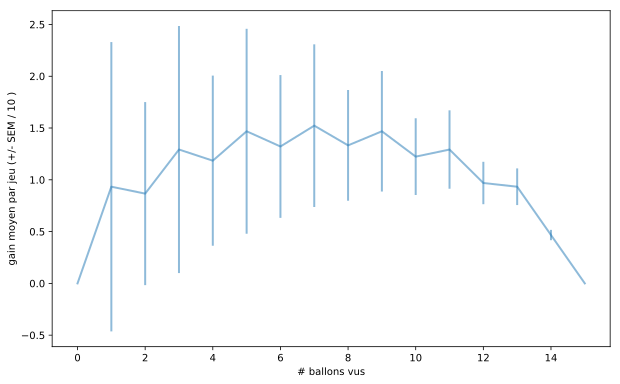

In [57]:
agent = AgentTétu(N_ballons=16, N_test=None)
agent.plot();

Moyenne des gains avec 0 ballons vus = 0.0  +/-  0.0
Moyenne des gains avec 1 ballons vus = 0.8  +/-  3.91918358845
Moyenne des gains avec 2 ballons vus = 0.6  +/-  1.8
Moyenne des gains avec 3 ballons vus = 0.8  +/-  1.83303027798
Moyenne des gains avec 4 ballons vus = 0.4  +/-  0.489897948557
Moyenne des gains avec 5 ballons vus = 0.0  +/-  0.0


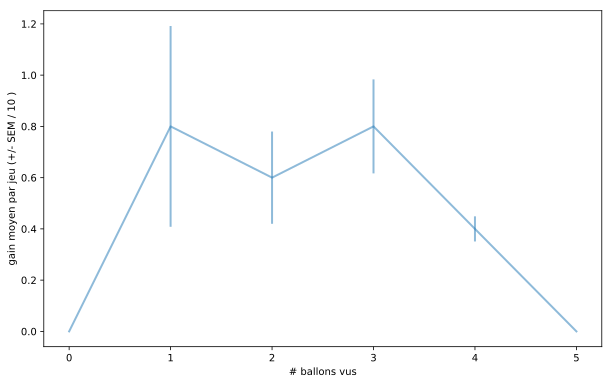

In [58]:
agent = AgentTétu(N_ballons=6, N_test=None)
agent.plot();

On peut aussi montrer en fonction du nombre de ballons vus l'evolution du gain au cours du temps (en fonction du nombre de tests):

Moyenne des gains avec 0 ballons vus = 0.01708984375  +/-  6.99997913834
Moyenne des gains avec 1 ballons vus = 0.796875  +/-  5.94684708349
Moyenne des gains avec 2 ballons vus = 0.7568359375  +/-  4.94238802237
Moyenne des gains avec 3 ballons vus = 1.0078125  +/-  3.87095775808
Moyenne des gains avec 4 ballons vus = 0.80712890625  +/-  2.8893845242
Moyenne des gains avec 5 ballons vus = 0.8427734375  +/-  1.81376209384
Moyenne des gains avec 6 ballons vus = 0.447265625  +/-  0.894401174358
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0


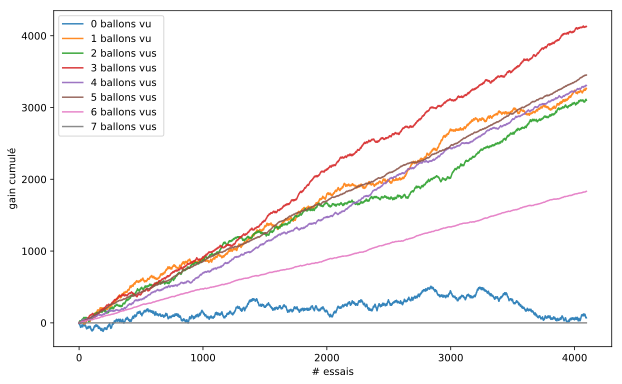

In [59]:
agent = AgentTétu()
gains = agent.test() 
gains_cumulés = np.cumsum(gains, axis=1)
fig, ax = plt.subplots(figsize=figsize)

for N_ballons_vus in range(agent.N_ballons):
    label = '%d ballons vu' % N_ballons_vus
    if N_ballons_vus>1: label += 's '
    ax.plot(gains_cumulés[N_ballons_vus, :], alpha=0.9, label=label)
    
ax.set_xlabel(' # essais ')
ax.set_ylabel(' gain cumulé ')
ax.legend();

Les tendances sont nettes et on observe bien que la stratégie optimale est vite payante. Notez toutefois, que par le jeu du hasard, ce n'étatit peut-être pas vrai au tout début.

### une deuxième stratégie: choix au fil de l'eau

Nous avons qualifié cette stratégie de tétue car elle décidait *a priori* quel était le nombre optimal de ballons à voir sans examiner ce qui venait d'être observé dans un test particulier. Par exemple, les chances sont complétement différentes si on a observé deux ballons de même type contre deux ballons différents. De la même façon, notre stratégie devrait dépendre en fonction de ce qu'on vient de voir. 

Mais ce que nous avons vu au dessus peut nous être utile. Imaginons que nous avons vu un certain nombre de ballons, on peut alors faire assez de tests pour anticiper en moyenne les gains que l'on peut espérer si on attend un tour ou plus. La stratégie consiste alors à parier si le gain présent est supérieur à celui auquel qui est prédit si on attend un tour ou plus.

Il faut juste modifier l'agent ci-dessus en lui donnant la possibilité d'avoir un nombre différent de ballons de baskets ou de ballons de foot:

Moyenne des gains avec 0 ballons vus = 1.74829101562  +/-  6.77816188392
Moyenne des gains avec 1 ballons vus = 1.55712890625  +/-  5.79442400669
Moyenne des gains avec 2 ballons vus = 1.11206054688  +/-  4.87476372146
Moyenne des gains avec 3 ballons vus = 1.3076171875  +/-  3.78022979341
Moyenne des gains avec 4 ballons vus = 1.03125  +/-  2.81718360025
Moyenne des gains avec 5 ballons vus = 0.900390625  +/-  1.78586021917
Moyenne des gains avec 6 ballons vus = 0.491943359375  +/-  0.870627205621
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0


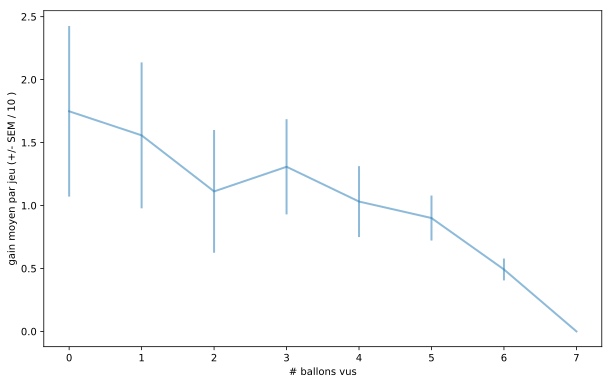

In [60]:
class AgentTétuAvecInit:

    def __init__(self, N_test=2**13, N_basket=4, N_foot=4, verbose=True):
        self.verbose = verbose
        self.N_test = N_test
        self.N_ballons = N_basket + N_foot
        self.N_foot = N_foot
        self.N_basket = N_basket

    def generate_test(self):
        return generate_test(N_ballons=self.N_ballons, N_basket=self.N_basket, N_test=self.N_test)

    def agent_tetu(self, tests, N_ballons_vus):
        gains = np.zeros(tests.shape[0])
        for i_test in range(tests.shape[0]):
            information = tests[i_test, :(N_ballons_vus)]
            N_ballons_restant = self.N_ballons - N_ballons_vus
            proba_True_restant = (self.N_basket - sum(information)) / N_ballons_restant 
            if proba_True_restant==.5:
                if self.N_test is None:
                    gains[i_test] = 0.
                else:
                    choix = np.random.rand() > .5
                    réussite = (tests[i_test, N_ballons_vus] == choix)
                    gain_esperé = N_ballons_restant - 1
                    gains[i_test] = gain_esperé * (réussite*2 - 1)
            else:
                choix = proba_True_restant > .5
                réussite = (tests[i_test, N_ballons_vus] == choix)
                gain_esperé = N_ballons_restant - 1
                gains[i_test] = gain_esperé * (réussite*2 - 1)

        return gains

    def test(self):
        tests = self.generate_test()
        
        gains = np.zeros((self.N_ballons, tests.shape[0]))
        for N_ballons_vus in range(self.N_ballons):
            gains[N_ballons_vus, :] = self.agent_tetu(tests, N_ballons_vus)
            if self.verbose: print('Moyenne des gains avec', N_ballons_vus, 'ballons vus =', np.mean(gains[N_ballons_vus, :]) , 
                  ' +/- ', np.std(gains[N_ballons_vus, :]) )
        return gains
    
    def razor(self):
        gains = self.test() 
        gain_moyen = gains.mean(axis=1)
        return gain_moyen[0]>gain_moyen[1:].max()

    def plot(self):
        gains = self.test()
        fig, ax = plt.subplots(figsize=figsize)
        ax.errorbar(np.arange(self.N_ballons), y=np.mean(gains, axis=(1)), yerr=np.std(gains, axis=(1))/10, alpha=.5, lw=2)

        ax.set_xlabel(' # ballons vus ')
        ax.set_ylabel(' gain moyen par jeu (+/- SEM / 10 ) ')
        return fig, ax
    
agent = AgentTétuAvecInit(N_basket=5, N_foot=3)
agent.plot();

On vérifie que l'on retrouve l'agent initial avec un nombre balancé de ballons:

Moyenne des gains avec 0 ballons vus = 0.0888671875  +/-  6.99943587891
Moyenne des gains avec 1 ballons vus = 0.908203125  +/-  5.93086562685
Moyenne des gains avec 2 ballons vus = 0.679931640625  +/-  4.95355356932
Moyenne des gains avec 3 ballons vus = 1.0625  +/-  3.85630571273
Moyenne des gains avec 4 ballons vus = 0.746337890625  +/-  2.90568060065
Moyenne des gains avec 5 ballons vus = 0.845703125  +/-  1.81239792109
Moyenne des gains avec 6 ballons vus = 0.429931640625  +/-  0.90286144252
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0


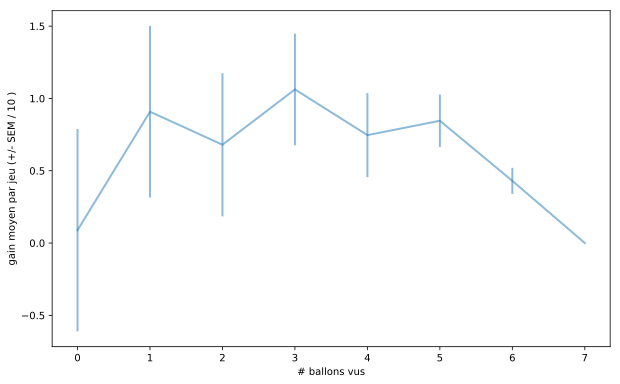

In [61]:
agent = AgentTétuAvecInit(N_basket=4, N_foot=4)
agent.plot();

En particulier, il semble qu'il vaille mieux attendre quand on a tiré un seul ballon car on peut espérer un gain moyen supérieur:

Moyenne des gains avec 0 ballons vus = 0.87744140625  +/-  5.93549463639
Moyenne des gains avec 1 ballons vus = 0.579833984375  +/-  4.96626545309
Moyenne des gains avec 2 ballons vus = 1.02734375  +/-  3.86582007074
Moyenne des gains avec 3 ballons vus = 0.804931640625  +/-  2.88999741417
Moyenne des gains avec 4 ballons vus = 0.833984375  +/-  1.81782014024
Moyenne des gains avec 5 ballons vus = 0.443603515625  +/-  0.896223142373
Moyenne des gains avec 6 ballons vus = 0.0  +/-  0.0


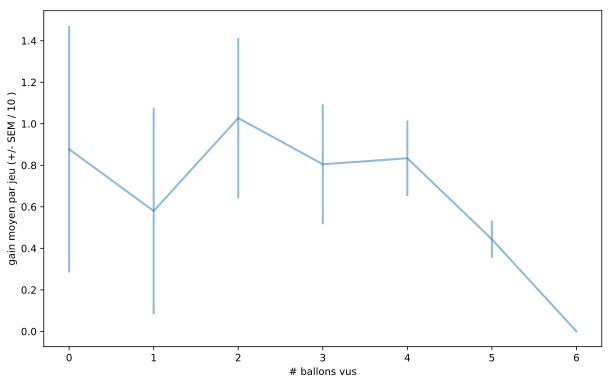

In [62]:
agent = AgentTétuAvecInit(N_basket=4, N_foot=3)
agent.plot();

Notre prédiction donne aussi l'information que le gain espéré sera meilleur dans exactement deux coups! Mais bien sûr, celà dépend de l'occurence suivante.

En particulier, si on tire encore un ballon de basket, il vaut mieux attendre:

Moyenne des gains avec 0 ballons vus = -0.01953125  +/-  4.99996185288
Moyenne des gains avec 1 ballons vus = 0.76953125  +/-  3.92527981872
Moyenne des gains avec 2 ballons vus = 0.592529296875  +/-  2.94090275806
Moyenne des gains avec 3 ballons vus = 0.7861328125  +/-  1.8390201742
Moyenne des gains avec 4 ballons vus = 0.415771484375  +/-  0.909469115903
Moyenne des gains avec 5 ballons vus = 0.0  +/-  0.0


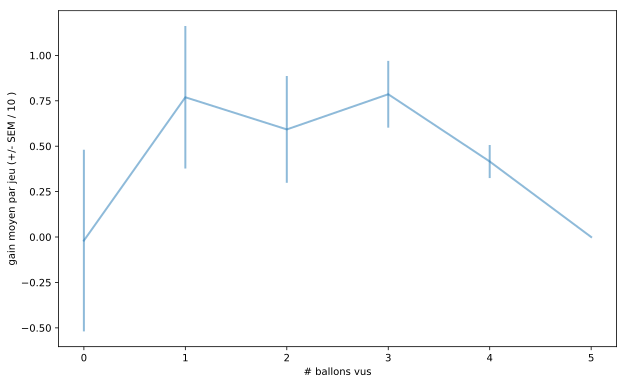

In [63]:
agent = AgentTétuAvecInit(N_basket=3, N_foot=3)
agent.plot();

Alors que si on observe un ballon de foot, il vaut mieux parier:

Moyenne des gains avec 0 ballons vus = 1.66381835938  +/-  4.71505126876
Moyenne des gains avec 1 ballons vus = 1.322265625  +/-  3.77513094037
Moyenne des gains avec 2 ballons vus = 0.99755859375  +/-  2.82928910718
Moyenne des gains avec 3 ballons vus = 0.953125  +/-  1.75828118752
Moyenne des gains avec 4 ballons vus = 0.473876953125  +/-  0.880591070416
Moyenne des gains avec 5 ballons vus = 0.0  +/-  0.0


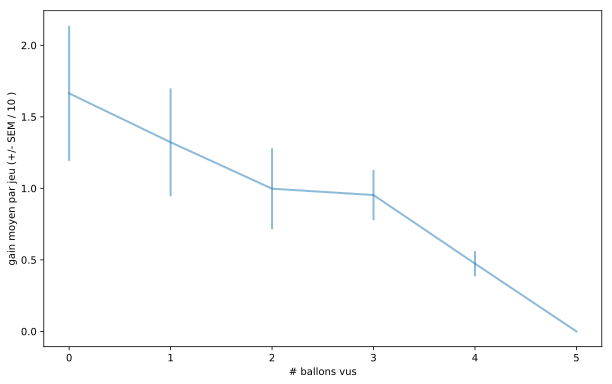

In [64]:
agent = AgentTétuAvecInit(N_basket=4, N_foot=2)
agent.plot();

En bref, notre nouvel agent permet de prendre une décision:

In [65]:
gains = agent.test() 
gain_moyen = gains.mean(axis=1)
print('Gain si on parie:', gain_moyen[0], 'Gain moyen max si on attend  :', gain_moyen[1:].max(),  )
print('Should I stay? ', gain_moyen[0]<gain_moyen[1:].max(), ' or should I go?  ', gain_moyen[0]>gain_moyen[1:].max() )

Moyenne des gains avec 0 ballons vus = 1.68823242188  +/-  4.70636497626
Moyenne des gains avec 1 ballons vus = 1.392578125  +/-  3.74976348131
Moyenne des gains avec 2 ballons vus = 0.985107421875  +/-  2.83364841986
Moyenne des gains avec 3 ballons vus = 0.91748046875  +/-  1.77714084683
Moyenne des gains avec 4 ballons vus = 0.463134765625  +/-  0.886287870203
Moyenne des gains avec 5 ballons vus = 0.0  +/-  0.0
Gain si on parie: 1.68823242188 Gain moyen max si on attend  : 1.392578125
Should I stay?  False  or should I go?   True


Dans ce cas particulier, il faut donc parier!

On peut obtenir cette décision *via* l'objet avec la fonction ``razor``:

In [66]:
N_basket = 3
N_foot = 5
décision = AgentTétuAvecInit(N_basket=N_basket, N_foot=N_foot, verbose=False).razor()
print('Pour N_basket=', N_basket, ', N_foot= ', N_foot, ' Parier = ', décision)

Pour N_basket= 3 , N_foot=  5  Parier =  True


Finalement, on obtient une grille des stratégies optimales:

In [67]:
N_ballons = 8
go = np.zeros((N_ballons//2+1, N_ballons//2+1))*np.nan
go[0, :] = 1 # quand il n'y a plus de ballons, l'information est certaine
go[:, 0] = 1

for N_basket in range(1, N_ballons//2 + 1):
    for N_foot in range(1, N_ballons//2 + 1):
        go[N_basket, N_foot] = AgentTétuAvecInit(N_basket=N_basket, N_foot=N_foot, verbose=False, N_test=None).razor()
go

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.]])

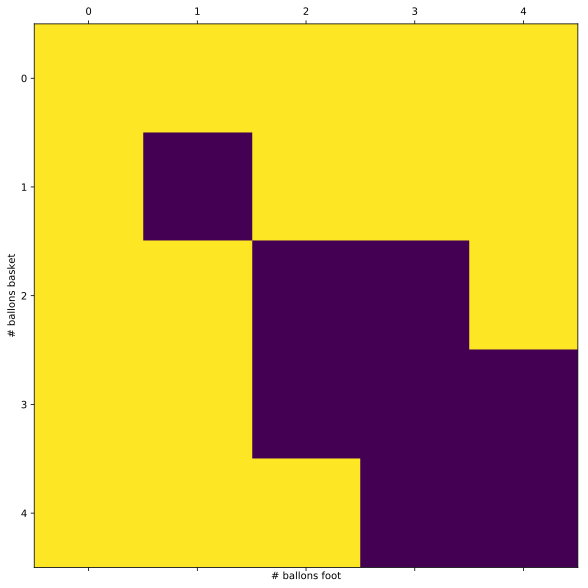

In [68]:
fig, ax = plt.subplots(figsize=(figsize[0], figsize[0]))

ax.matshow(go)

ax.set_xlabel(' # ballons foot ')
ax.set_ylabel(' # ballons basket ');

La figure se lit comme suit: sur un axe, on a le nombre de foot restant, sur l'autre axe le nombre de ballons de basket restant. Notre jeu commence donc en bas à droite et on peu considérer chaque instance du jeu (toutes les combinaisons possibles) comme des trajectoires partant du point initial et en se déplaçant soit d'un pas vers la gauche, soit d'un pas vers le haut. Notre agent nous a montré une stratégie optimale donnée par la couleur des cases: si elle est bleue, on attend, si on touche une jaune, il faut parier (pour la direction correspondant bien sûr au plus probable, c'est-à-dire pour lequel le nombre de ballons restant est supérieur).

La stratégie de cet agent peut donc se résumer exactement par ce graphe: **il faut parier quand l'écart en nombres de ballons est supérieur au quart du nombre total de ballons restant**.

En mathématiques, un tel résultat peut être considéré comme un *théorème*: il permet de donner une stratégie simple (une heuristique) qui a été prouvée sur l'ensemble de tous les cas possibles.

In [69]:
N_ballons = 8
go = np.zeros((N_ballons//2+1, N_ballons//2+1))
go[0, :] = 1 # quand il n'y a plus de ballons, l'information est certaine
go[:, 0] = 1

for N_basket in range(1, N_ballons//2 + 1):
    for N_foot in range(1, N_ballons//2 + 1):
        if np.abs(N_basket - N_foot) > (N_basket + N_foot)/4:
            go[N_basket, N_foot] = 1
go

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.]])

à noter que  le cas $(N_{basket}=3, N_{foot}=2)$ (ou symétriquement $(N_{basket}=2, N_{foot}=3)$) est indécis: on peut aussi bien passer que parier.

Moyenne des gains avec 0 ballons vus = 0.8  +/-  3.91918358845
Moyenne des gains avec 1 ballons vus = 0.6  +/-  1.8
Moyenne des gains avec 2 ballons vus = 0.8  +/-  1.83303027798
Moyenne des gains avec 3 ballons vus = 0.4  +/-  0.489897948557
Moyenne des gains avec 4 ballons vus = 0.0  +/-  0.0


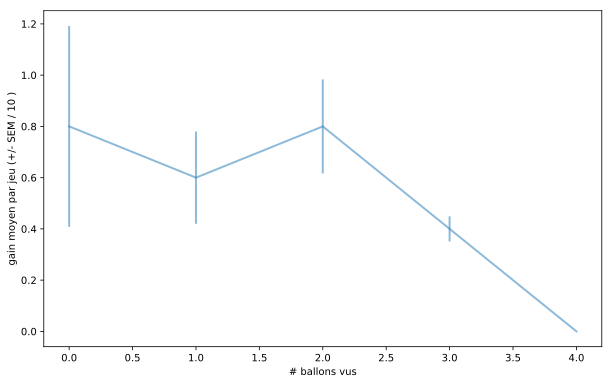

In [70]:
AgentTétuAvecInit(N_basket=3, N_foot=2, N_test=None).plot();

on remarque aussi que le choix d'attendre de 2 tours est environ 2 fois moins indécis. C'est un point que l'on a pas pris en compte dans notre critère (gagner le plus *en moyenne*) mais qui pourrait être pris en compte par exemple si on exprime le désir de pas avoir perdu de l'argent au bout d'un certain temps avec un certain taux de confiance. Mais c'est l'objet d'un étude plus poussée... mais très intéressante quand on sait que l'aversion au risque peut varier d'une personne à l'autre.

C'est une symétrie que nous avons aussi observé pour le jeu avec $N_{ballons}=6$ ou  $N_{ballons}=10$ et qu'il serait utile d'étudier si on veut étudier l'aversion au risque d'un joueur.

### un "meta-agent"

Intéressons-nous plutôt à construire un agent qui va utiliser l'agent tétu (mais simplement sur l'ensemble des combinaisons pour gagner du temps de calcul) pour décider ce qu'il faut faire à chaque tour dans chaque jeu. À noter qu'on aurait pu aussi utiliser notre "théorème", mais cet agent reste plus général:

In [71]:
N_test = 2**13
N_test_agent = None

class MetaAgent:

    def __init__(self, N_test=N_test, N_test_agent=N_test_agent, N_basket=4, N_foot=4, verbose=True):
        self.N_test = N_test
        self.N_test_agent = N_test_agent
        self.N_basket = N_basket
        self.N_foot = N_foot
        self.N_ballons = N_basket + N_foot
        self.verbose = verbose

    def generate_test(self):
        return generate_test(N_ballons=self.N_ballons, N_basket=self.N_basket, N_test=self.N_test)

    def meta_agent(self, tests):
        gains = np.zeros(tests.shape[0])
        for i_test in range(tests.shape[0]):
            for N_ballons_vus in range(self.N_ballons):
                N_basket = self.N_basket - sum(tests[i_test, :(N_ballons_vus)]==1)
                N_foot = self.N_foot - sum(tests[i_test, :(N_ballons_vus)]==0)
                N_ballons_restant = self.N_ballons - N_ballons_vus
                assert(N_foot+N_basket == N_ballons_restant)
                if N_basket==0 or N_foot==0 :
                    break
                elif AgentTétuAvecInit(N_basket=N_basket, N_foot=N_foot, verbose=False, N_test=self.N_test_agent).razor():
                    break
                    
            proba_True_restant = N_basket / N_ballons_restant 
            if proba_True_restant==.5:
                if self.N_test is None:
                    gains[i_test] = 0.
                else:
                    choix = np.random.rand() > .5
                    réussite = (tests[i_test, N_ballons_vus] == choix)
                    gain_esperé = N_ballons_restant - 1
                    gains[i_test] = gain_esperé * (réussite*2 - 1)
            else:
                choix = proba_True_restant > .5
                réussite = (tests[i_test, N_ballons_vus] == choix)
                gain_esperé = N_ballons_restant - 1
                gains[i_test] = gain_esperé * (réussite*2 - 1)

        return gains

    def test(self):
        tests = self.generate_test()
        gains = self.meta_agent(tests)
        if self.verbose: print('Moyenne des gains =', np.mean(gains), 
                  ' +/- ', np.std(gains) )
        return gains
    

In [72]:
agent = AgentTétuAvecInit(N_test=N_test, N_basket=4, N_foot=4, verbose=True)
gains = agent.test() 
gains_cumulés = np.cumsum(gains, axis=1)

Moyenne des gains avec 0 ballons vus = -0.10595703125  +/-  6.99919803317
Moyenne des gains avec 1 ballons vus = 0.8583984375  +/-  5.93827854875
Moyenne des gains avec 2 ballons vus = 0.70068359375  +/-  4.95066081462
Moyenne des gains avec 3 ballons vus = 0.96484375  +/-  3.88189084572
Moyenne des gains avec 4 ballons vus = 0.8466796875  +/-  2.87804334692
Moyenne des gains avec 5 ballons vus = 0.8466796875  +/-  1.81194191595
Moyenne des gains avec 6 ballons vus = 0.43212890625  +/-  0.901811847551
Moyenne des gains avec 7 ballons vus = 0.0  +/-  0.0


In [73]:
agent = MetaAgent(N_test=N_test, N_basket=4, N_foot=4, verbose=True)
meta_gains = agent.test()

Moyenne des gains = 1.27648925781  +/-  3.54179068119


Au final, notre nouvel agent se révèle être plus performant que l'agent naïf...

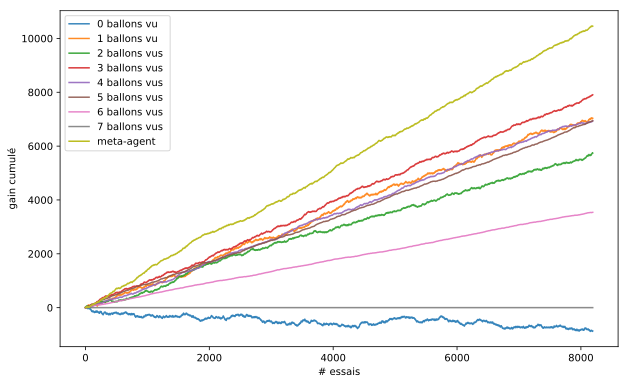

In [74]:
fig, ax = plt.subplots(figsize=figsize)

for N_ballons_vus in range(agent.N_ballons):
    label = '%d ballons vu' % N_ballons_vus
    if N_ballons_vus>1: label += 's '
    ax.plot(gains_cumulés[N_ballons_vus, :], alpha=0.9, label=label)
    
ax.plot(np.cumsum(meta_gains), alpha=1., label='meta-agent')

ax.set_xlabel(' # essais ')
ax.set_ylabel(' gain cumulé ')
ax.legend();

... mais est-ce l'agent vraiment optimal? Peut-on créer un meta-meta-agent? La question reste ouverte :-)